# Solutions to Modern Data Science Problems (probelms till 18.12)
by *Mateusz Kmieć* 

In [251]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import pandas as pd
%matplotlib inline

### Problem. 32

We consider a linear regression model. Let’s assume that the error model is additive $y
= f(x) + \epsilon$ , and errors have Gaussian distribution with 0 mean ($\text{E}[\epsilon]=0$) and variance 
($\text{Var}[\epsilon] =\sigma^{2}$). Show that the MLE approach leads to the same minimization problem as OLS
solution for the quadratic loss function $L(Y,f(X))= (Y-f(X))^{2}$.

### Problem.33

(Optional) - Gauss-Markov theorem
Show that the ordinary least squares estimator has the lowest variance among all
unbiased linear estimators (is an “efficient” estimator) under the assumptions that:

- Its errors have zero expectation values

- its variances are equal.

- errors are uncorrelated

### Problem 34.

Implement the simple linear regression model
Test your implementation on the data x08.csv or x26.csv
Calculate the test and training errors
You can prepare your own program or use this notebook:

[1] https://github.com/wkrzemien/dataScienceAndML2020/blob/master/notebooks/simple_linear_regression/simple_linear_regression_template.ipynb


Disclaimer in the solution of this problem I used the notebook prepared by Wojciech Krzemień [1].

#### I chose to analyse x08.csv. Let us load now load data!

In [252]:
#Please note 'raw' prefix in the url and the lack of 'blob' part
url='https://raw.github.com/wkrzemien/dataScienceAndML2020/master/datasets/x08.csv'
urllib.request.urlretrieve(url,'x08.csv')

FILE_NAME = 'x08.csv'

data = pd.read_csv(FILE_NAME, names=['index','inhabitants','incomeBelow5k','unemployed','murders'])
data.head()

,index,inhabitants,incomeBelow5k,unemployed,murders
0,1,587000,16.5,6.2,11.2
1,2,643000,20.5,6.4,13.4
2,3,635000,26.3,9.3,40.7
3,4,692000,16.5,5.3,5.3
4,5,1248000,19.2,7.3,24.8


In [253]:
def loadData(filename):
    columns = ['index','inhabitants','incomeBelow5k','unemployed','murders']
    data = pd.read_csv(filename, names=columns)
    
    fraction = 0.75
    trainingSet=data.sample(frac=fraction)
    testSet=data.drop(trainingSet.index)
    
    dataset1 = trainingSet['inhabitants']
    dataset2 = trainingSet['incomeBelow5k']
    dataset3 = trainingSet['unemployed']
    dataset4 = trainingSet['murders']
    
    testset1 = testSet['inhabitants']
    testset2 = testSet['incomeBelow5k']
    testset3 = testSet['unemployed']
    testset4 = testSet['murders']
    
    
    return columns[1:4], [dataset1, dataset2, dataset3], dataset4, [testset1, testset2, testset3], testset4

In [254]:
class MySimpleLinearRegression():
    def __init__(self):
        self._theta = [0, 0]
        self._error = 0

    def fit(self, X, Y):
        size=len(X)
        xx=np.array(X).reshape(-1, 1).reshape(size,1)
        x = np.asmatrix(np.c_[np.ones((size,1)),xx])
        y = np.array(Y).reshape(-1, 1).reshape(size,1)  
        
        #calculation of parameters, closed form solution, linear regression OLS.
        theta = np.linalg.inv(x.T*x)*x.T*y    
        self._theta = [theta.item(0),theta.item(1)] 
        
        error=(((x@theta-y).T)@(x@theta-y))*(1/y.shape[0])
        
        self._error = error[0,0]
        
        return  self._theta

    def getParams(self):
        return self._theta

    def predict(self, x):         
        return self._theta[1]*x+self._theta[0] 
    
    def getError(self):
        return self._error
        

In [270]:
def plotData(data1, data2, test1, test2, names):
    
    #model fitting
    model = MySimpleLinearRegression()
    model.fit(data1, data2)
    print("Parameters [intercept, slope] = ",model.getParams(),",")
    yPredicted = [model.predict(x) for x in data1]
        
    #Training error
    print("Training error = {:.4f}".format(model.getError()))
      
    #Test error
    yPredicted_test = [model.predict(x) for x in test1]
    Dy = np.array(test2)-np.array(yPredicted_test)
    Dy2 = np.square(Dy)
    Error_test= np.average(Dy2)
    print("Test error = {:.4f}".format(Error_test))
    
    #plot the best line and data
    plt.scatter(data1, data2)
    plt.plot(data1, yPredicted)  
    plt.xlabel(names)
    plt.ylabel('murder')
    plt.show()

Parameters [intercept, slope] =  [23.521578739876585, -1.0109867551890678e-06] ,
Training error = 79.4876
Test error = 144.2062


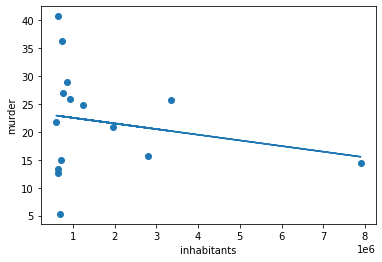

Parameters [intercept, slope] =  [-28.5492539132064, 2.467663323647945] ,
Training error = 25.2958
Test error = 34.6563


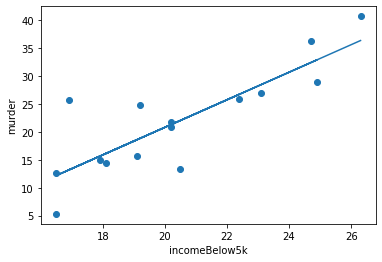

Parameters [intercept, slope] =  [-26.02815995525718, 6.7088926174496635] ,
Training error = 18.6634
Test error = 38.3117


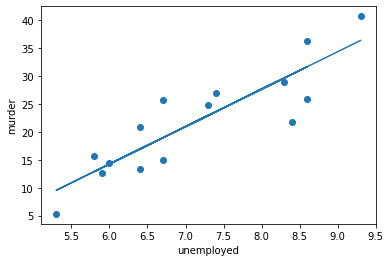

In [271]:
names, datas, murder, test_sets, test_murder = loadData(FILE_NAME)
for i,d in enumerate(datas):
    plotData(d.tolist(), murder.tolist(), test_sets[i].tolist(), test_murder.tolist(), names[i])

In [220]:
#ready test written by WK, edited by Mateusz Kmieć
def runTest_MySimpleLinearRegression():
    model = MySimpleLinearRegression()
    x = [0, 1, 2, 3]
    y = [-4., -2, 0, 2]
    model.fit(x, y)
    params = model.getParams()
    np.testing.assert_almost_equal(params[0], -4.)
    np.testing.assert_almost_equal(params[1], 2.)
    np.testing.assert_almost_equal(model.predict(7), 10.)
    
    print("Tested positive! Fitted parameters values: ")
    return params

In [221]:
runTests_MySimpleLinearRegression()

Tested positive! Fitted parameters values: 


[-4.000000000000002, 2.000000000000001]